In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split 

import folium # map locations
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

#models
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

import os


In [2]:
df = pd.read_csv("Fish.csv")

In [3]:
df.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


In [4]:
df["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

**Our target variable is Weight**

# Pike

<a href="https://ibb.co/71QQM9m"><img src="https://i.ibb.co/vjhhytn/turna.jpg" alt="turna" border="0"></a>

Esox is a genus of freshwater fish commonly known as pike or pickerel. It is the type genus of the family Esocidae. The type species of the genus is Esox lucius, the northern pike.

Ancestral Esox species had been present in Laurentia (which later became North America) and Eurasia since the Paleogene. Modern large pike species are native to the Palearctic and Nearctic realms, ranging across Northern America and from Western Europe to Siberia in North Asia.

Pikes have the elongated, torpedo-like shape typical of predatory fishes, with sharply pointed heads and sharp teeth. Their coloration is typically grey-green with a mottled or spotted appearance with stripes along their backs, providing camouflage among underwater weeds, and each individual pike marking patterns are unique like fingerprints. Pikes can grow to a maximum recorded length of 1.83 m (6 ft), reaching a maximum recorded weight of 35 kg (77 lb).

In [5]:
df_pike = df[df["Species"] == "Pike"].reset_index().drop("index", axis = 1)
df_pike.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756
1,Pike,300.0,31.7,34.0,37.8,5.7078,4.1580
2,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844
3,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198
4,Pike,430.0,35.5,38.0,40.5,7.2900,4.5765


In [6]:
df_pike.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
std,494.140765,9.029087,9.714116,10.167426,1.664228,1.140269
min,200.000000,30.000000,32.300000,34.800000,5.568000,3.375600
25%,345.000000,35.500000,38.000000,40.500000,6.396000,4.322500
50%,510.000000,40.100000,43.000000,45.800000,7.290000,4.870000
75%,950.000000,48.300000,51.700000,55.100000,8.926200,6.144000
max,1650.000000,59.000000,63.400000,68.000000,10.812000,7.480000


## Pike Graph

- Histogram
- Boxplot
- 2D Denstiy
- Map Locations

Text(0.5, 1.0, 'Pike Histogram')

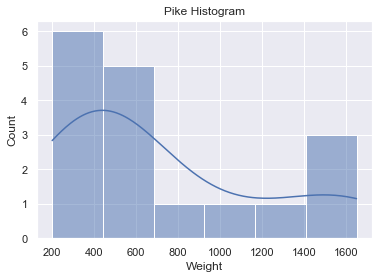

In [7]:
sns.histplot(data=df_pike, x="Weight", kde = True)
plt.title("Pike Histogram")

<AxesSubplot:>

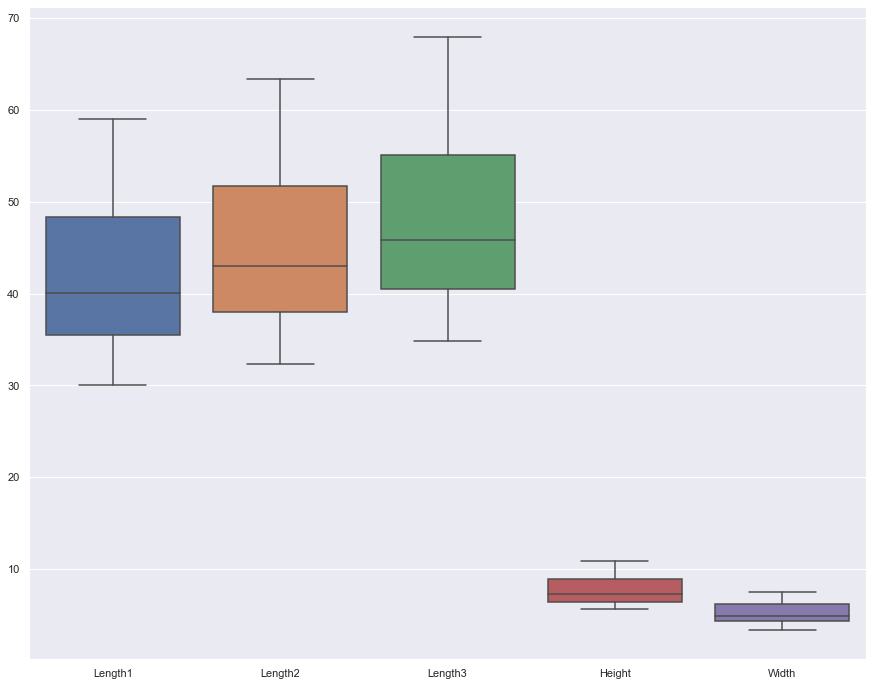

In [8]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=df_pike.loc[:, ["Length1","Length2","Length3", "Height","Width"]])


<AxesSubplot:xlabel='Weight', ylabel='Length1'>

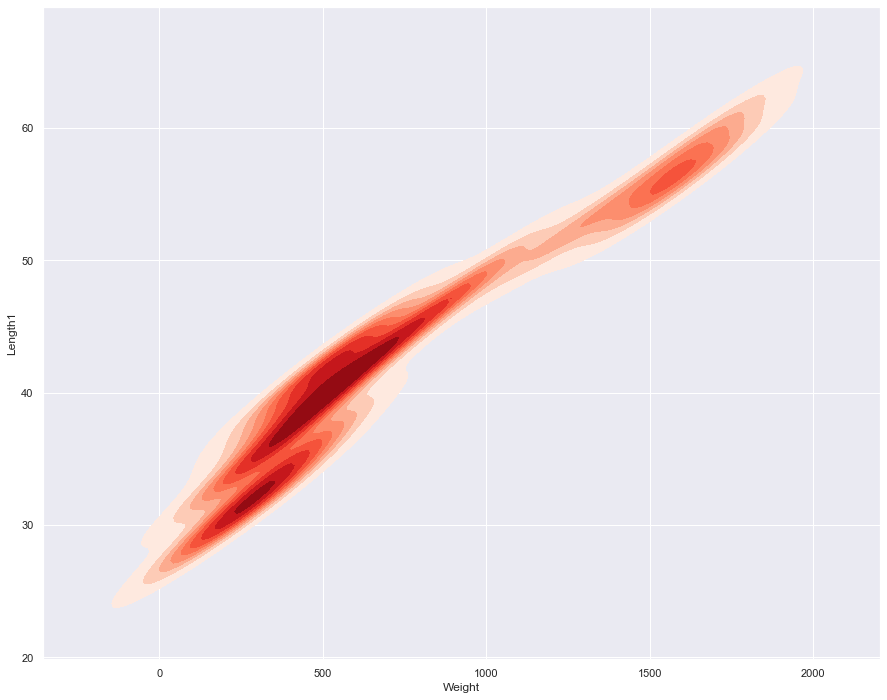

In [9]:
plt.figure(figsize=(15, 12))
sns.kdeplot(x = df_pike["Weight"], y = df_pike["Length1"], cmap = "Reds", shade = True, bw_adjust = .6)


In [10]:
plt.figure(figsize=(15, 10))

map = folium.Map(location=[40.71441636809976, 30.203692574148704], zoom_start= 13)
map

<Figure size 1080x720 with 0 Axes>

# Perch 


<a href="https://ibb.co/NsDJbTt"><img src="https://i.ibb.co/56pSwKG/perch.jpg" alt="perch" border="0"></a>

Perch is a common name for fish of the genus Perca, freshwater gamefish belonging to the family Percidae. The perch, of which three species occur in different geographical areas, lend their name to a large order of vertebrates: the Perciformes, from the Greek: πέρκη (perke), simply meaning perch, and the Latin forma meaning shape. Many species of freshwater gamefish more or less resemble perch, but belong to different genera. In fact, the exclusively saltwater-dwelling red drum is often referred to as a red perch, though by definition perch are freshwater fish. Though many fish are referred to as perch as a common name, to be considered a true perch, the fish must be of the family Percidae.

**Speicies**

**The European perch** (P. fluviatilis) is found in Europe and Asia. This species is typically greenish in color with dark vertical bars on its sides with a red or orange coloring in the tips of its fins. The European perch has been successfully introduced in New Zealand and Australia, where it is known as the redfin perch or English perch. In Australia, larger specimens have been bred, but the species rarely grows heavier than 2.7 kg (6 lb).

**The Balkhash perch** (P. schrenkii) is found in Kazakhstan, (in Lake Balkhash and Lake Alakol), Uzbekistan, and China. It is very similar to the European perch, and grows to a comparable size.

**The yellow perch** (P. flavescens), smaller and paler than the European perch, is found in North America. In northern areas, it is sometimes referred to as the lake perch. This species is prized for its food quality and has often been raised in hatcheries and introduced into areas in which it is not native. Yellow perch are almost identical in appearance to European perch, but have a more yellow coloring. These fish typically only reach a size of about 38 cm (15 in) and 1 kg (2 lb 3 oz)

In [11]:
df_perch = df[df["Species"] == "Perch"]



In [12]:
df_perch.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
std,347.617717,8.561572,9.021668,9.529509,2.878177,1.774626
min,5.900000,7.500000,8.400000,8.800000,2.112000,1.408000
25%,120.000000,19.825000,21.825000,23.325000,5.692500,3.525000
50%,207.500000,23.250000,25.300000,26.750000,6.921800,4.154900
75%,692.500000,34.125000,36.625000,39.075000,10.846500,6.448125
max,1100.000000,41.100000,44.000000,46.600000,12.800200,8.142000


## Perch Graph
- Histogram
- Boxplot
- 2D Denstiy
- Map Locations

Text(0.5, 1.0, 'Perch Histogram')

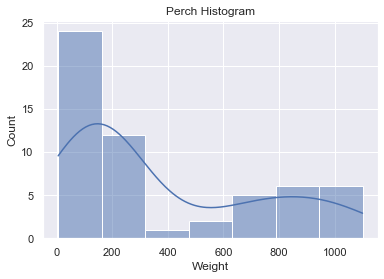

In [13]:
sns.histplot(data=df_perch, x="Weight", kde = True)
plt.title("Perch Histogram")



<AxesSubplot:>

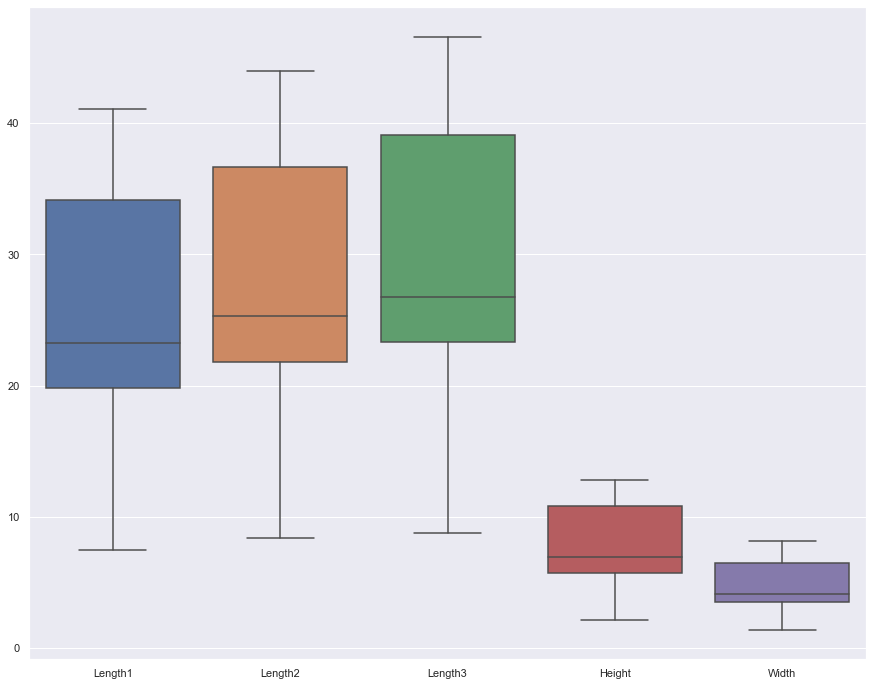

In [14]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=df_perch.loc[:, ["Length1","Length2","Length3", "Height","Width"]])



<AxesSubplot:xlabel='Weight', ylabel='Length1'>

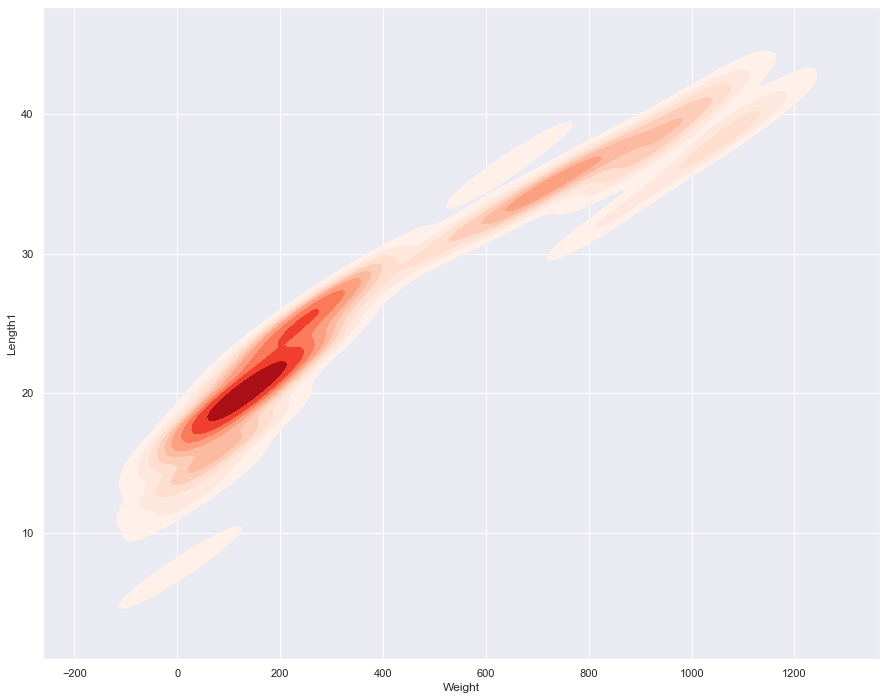

In [15]:
plt.figure(figsize=(15, 12))
sns.kdeplot(x = df_perch["Weight"], y = df_perch["Length1"], cmap = "Reds", shade = True, bw_adjust = .5)

In [16]:
plt.figure(figsize=(15, 10))

map = folium.Map(location=[40.14510606395323, 32.39492539061836], zoom_start= 15)
map

<Figure size 1080x720 with 0 Axes>

# Smelt

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Pond_smelt_illustration.jpg/220px-Pond_smelt_illustration.jpg)

Smelts are a family of small fish, the Osmeridae, found in the North Atlantic and North Pacific Oceans, as well as rivers, streams and lakes in Europe, North America and Northeast Asia. They are also known as freshwater smelts or typical smelts to distinguish them from the related Argentinidae (herring smelts or argentines), Bathylagidae (deep-sea smelts), and Retropinnidae (Australian and New Zealand smelts).

Some smelt species are common in the North American Great Lakes, and in the lakes and seas of the northern part of Europe, where they run in large schools along the saltwater coastline during spring migration to their spawning streams. In some western parts of the United States, smelt populations have greatly declined in recent decades, leading to their protection under the Endangered Species Act. The Delta smelt (Hypomesus transpacificus) found in the Sacramento Delta of California, and the eulachon (Thaleichthys pacificus) found in the Northeast Pacific and adjacent rivers, are both protected from harvest.

Some species of smelts are among the few fish that sportsmen have been allowed to net, using hand-held dip nets, either along the coastline or in streams. Some sportsmen also ice fish for smelt. They are often fried and eaten whole.

In [17]:
df_smelt = df[df["Species"] == "Smelt"]

In [18]:
df_smelt.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
std,4.131526,1.216372,1.432147,1.426457,0.351780,0.286611
min,6.700000,9.300000,9.800000,10.800000,1.728400,1.047600
25%,8.950000,10.475000,11.050000,12.100000,2.004450,1.161475
50%,9.850000,11.300000,11.800000,13.100000,2.200200,1.273100
75%,12.200000,11.650000,12.350000,13.475000,2.261225,1.356300
max,19.900000,13.800000,15.000000,16.200000,2.932200,2.067200


## Smelt Graph
- Histogram
- Boxplot
- 2D Denstiy
- Map Locations

Text(0.5, 1.0, 'Smelt Histogram')

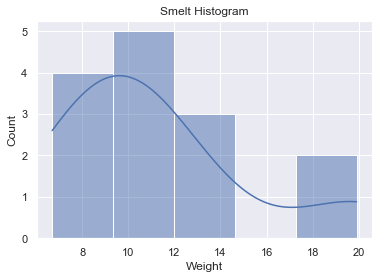

In [19]:
sns.histplot(data=df_smelt, x="Weight", kde = True)
plt.title("Smelt Histogram")

<AxesSubplot:>

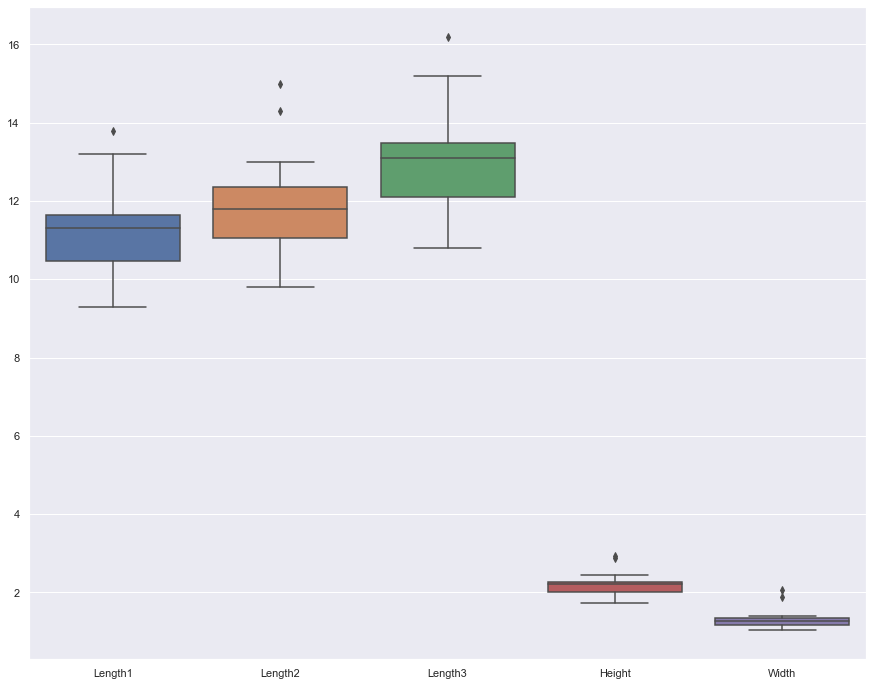

In [20]:

plt.figure(figsize=(15, 12))
sns.boxplot(data=df_smelt.loc[:, ["Length1","Length2","Length3", "Height","Width"]])

<AxesSubplot:xlabel='Weight', ylabel='Length1'>

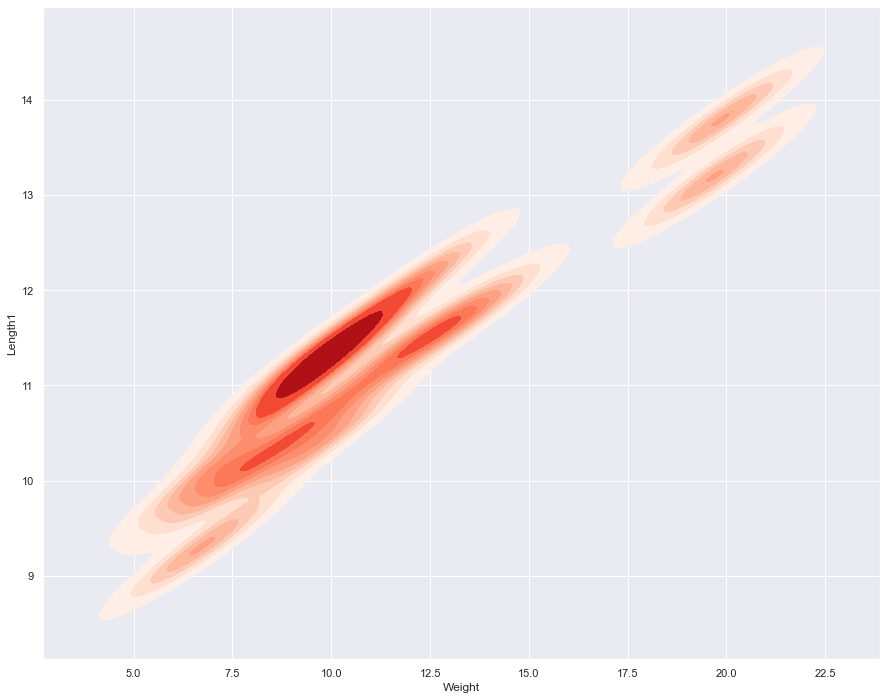

In [21]:

plt.figure(figsize=(15, 12))
sns.kdeplot(x = df_smelt["Weight"], y = df_smelt["Length1"], cmap = "Reds", shade = True, bw_adjust = .5)

**Locations**

![](https://www.fishbase.se/images/aquamaps/native/pic_Fis-23705.jpg)

In [22]:
plt.figure(figsize=(15, 10))

map = folium.Map(location=[54.28949846414915, 7.7506463026588595], zoom_start= 6)
map

<Figure size 1080x720 with 0 Axes>

# Whitefish

![](https://www.roughfish.com/sites/default/files/styles/large/public/RF%20whitefish.jpg?itok=11zAXhVf)

Lake whitefish are similar in appearance to other whitefishes in the Coregoninae subfamily of the salmon family Salmonidae, such as the northern cisco (Coregonus artedi). As with all salmonids, they have an adipose fin.To the distinction from cisco, the lake whitefish has a snout which overhangs the short lower jaw, so that the mouth opens in a slightly inferior position. Thus the fish can feed on the bottom of lake beds or grab food particulates out of the water or from the surface of a water body. The cisco in turn has a short snout with a lower jaw that extends beyond the snout. Both the cisco and lake whitefish are discernible from the mooneye due to the small posterior dorsal adipose fin. Another notable feature of the lake whitefish is the presence of two small flaps in each nostril. Their coloration is typically silver to white with an olive to pale-green or brown dorsal hues. The ventral fins are white and the tail has a dark posterior edge. The tail fin of the lake whitefish is severely forked, making it a fast swimmer.

Lake whitefish from inland lakes can reach a weight upwards of 5 pounds (2,300 g) (the largest Lake Whitefish caught on rod and reel is 15pounds 6 oz from Clear Lake Ontario Canada on May 21, 1983 by Chris T. D. Webster according to the Fresh Water Fishing Hall of Fame in Hayward Wis USA]]). On average, the lake whitefish weighs only 4 pounds. They can grow to 31 inches (79 cm) and commonly reach 20 inches (51 cm).

In [23]:
df_whitefish = df[df["Species"] == "Whitefish"]

In [24]:
df_whitefish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050
std,309.602972,5.580681,5.723781,6.023759,1.830201,1.194258
min,270.000000,23.600000,26.000000,28.700000,8.145400,4.247600
25%,279.000000,24.475000,26.875000,29.675000,8.479800,4.356775
50%,423.000000,27.050000,29.500000,32.400000,9.761000,5.603300
75%,735.000000,32.400000,35.050000,38.200000,11.506900,6.552750
max,1000.000000,37.300000,40.000000,43.500000,12.354000,6.573600


## Whitefish Graph
- Histogram
- Boxplot
- 2D Denstiy
- Map Locations

Text(0.5, 1.0, 'Whitefish Histogram')

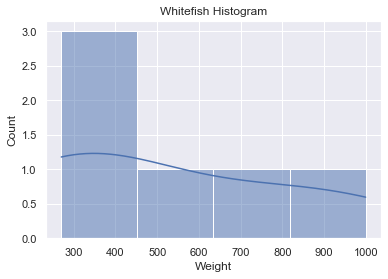

In [25]:
sns.histplot(data=df_whitefish, x="Weight", kde = True)
plt.title("Whitefish Histogram")

<AxesSubplot:>

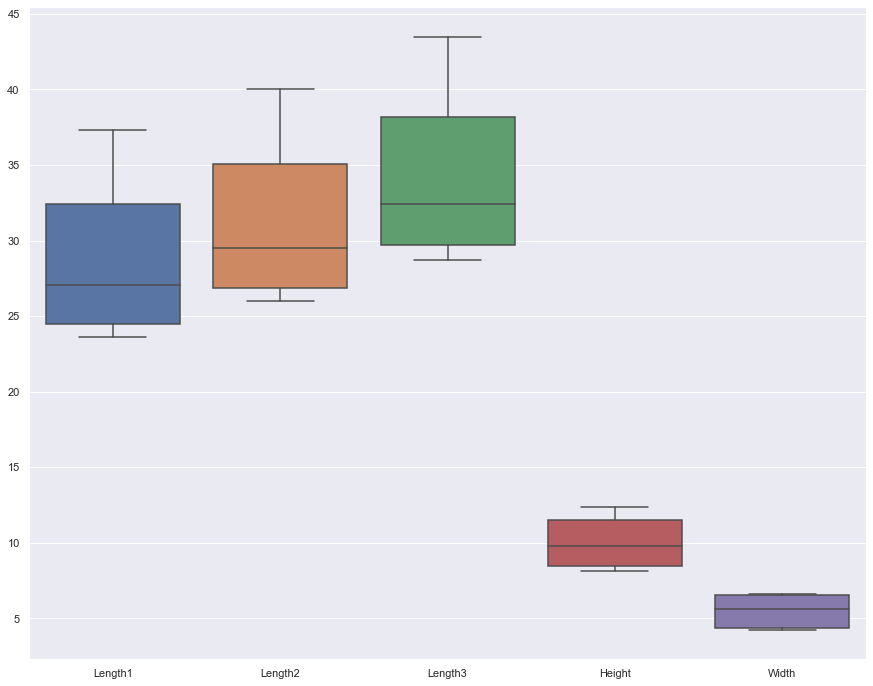

In [26]:

plt.figure(figsize=(15, 12))
sns.boxplot(data=df_whitefish.loc[:, ["Length1","Length2","Length3", "Height","Width"]])

<AxesSubplot:xlabel='Weight', ylabel='Length1'>

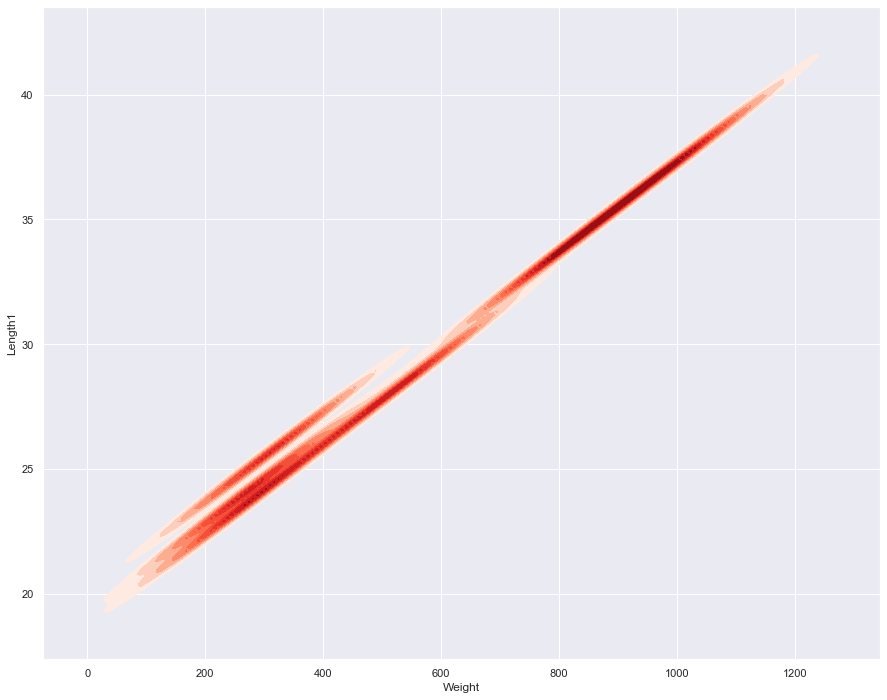

In [27]:
plt.figure(figsize=(15, 12))
sns.kdeplot(x = df_whitefish["Weight"], y = df_whitefish["Length1"], cmap = "Reds", shade = True, bw_adjust = .5)

In [28]:
plt.figure(figsize=(15, 10))

map = folium.Map(location=[47.78982091620774, -87.0514650320837], zoom_start= 8)
map

<Figure size 1080x720 with 0 Axes>

In [29]:
df["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

# Roach

![](https://d247nfungkrxrr.cloudfront.net/2014/02/25/roach-uros-kristan-s-fly-fishing-photo-of-a-roach-fly-dreamers-FDID749w10000h1mimg_530cf226126be.jpg)

The roach is a small fish, often reaching no more than about 35 centimetres (14 in); maximum length is 50 cm (20 in). Its body has a bluish-silvery colour and becomes white at the belly. The fins are red. The number of scales along the lateral line is 39–48. The dorsal and anal fins have 12–14 rays. Young specimens have a slender build; older specimens acquire a higher and broader body shape. The roach can often be recognized by the big red spot in the iris above and beside the pupil. Colours of the eye and fins can be very pale, however, in some environments.

In Central and Northern Europe, the common roach can most easily be confused with the common rudd (Scardinius erythropthalmus), the dace (Leuciscus leuciscus), or the ide (Leuciscus idus). They can be distinguished by these characteristics:

The common rudd has a more yellow/greenish or golden colour. The backfin is placed more backwards and between the tip of the ventral scales and the first ray of the anal fin are only one or two scales. The roach has four or five scales there. The mouth of the rudd is more upturned and the head appears sharper.
The dace has a greenish body, colorless eyes and fins, and a distinct 'nose'.
The ide has a higher number of scales along its lateral line (55–61), a rounder body, and a bigger mouth and head.

In [30]:
df_roach = df[df["Species"] == "Roach"]

In [31]:
df_roach.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
std,88.828916,3.459917,3.651946,4.031599,1.261192,0.690371
min,0.000000,12.900000,14.100000,16.200000,4.147200,2.268000
25%,104.250000,18.900000,20.375000,22.650000,6.037075,3.317325
50%,147.500000,20.500000,22.250000,24.850000,6.512600,3.602700
75%,171.750000,22.025000,23.625000,26.900000,7.164150,3.852900
max,390.000000,29.500000,31.700000,35.000000,9.485000,5.355000


![](https://mk0dynamitebaitfu5f6.kinstacdn.com/wp-content/uploads/2019/04/This-massive-fish-of-2lb-13oz-fell-to-the-tactics-described-a-cage-feeder-and-a-small-boilie.jpg)

## Roach Graph
- Histogram
- Boxplot
- 2D Denstiy
- Map Locations

Text(0.5, 1.0, 'Roach Histogram')

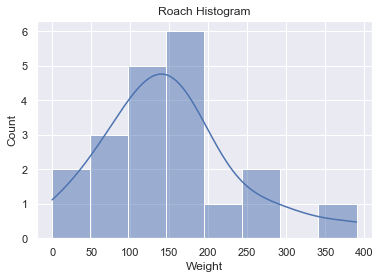

In [32]:
sns.histplot(data=df_roach, x="Weight", kde = True)
plt.title("Roach Histogram")

<AxesSubplot:>

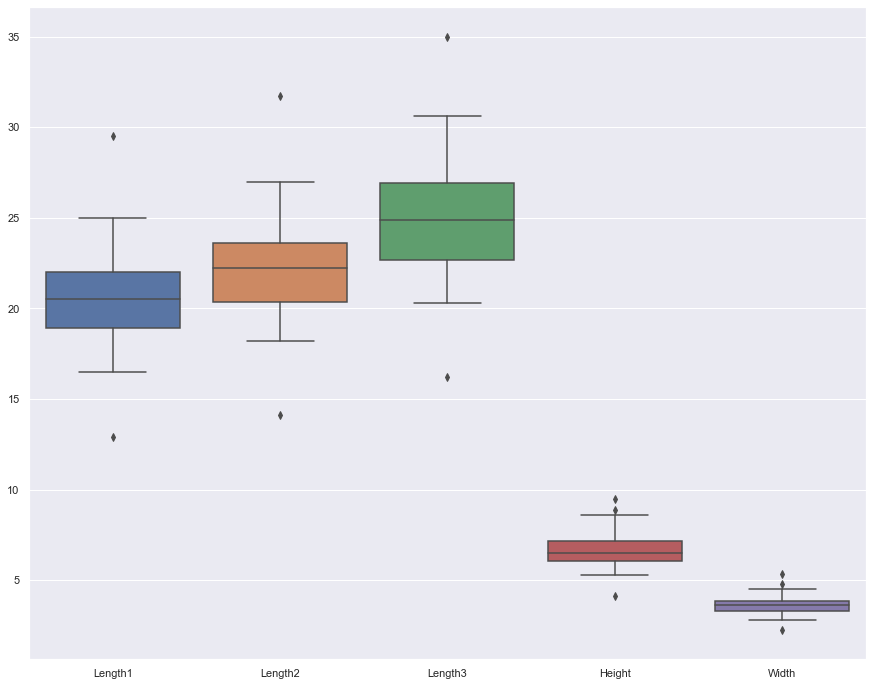

In [33]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=df_roach.loc[:, ["Length1","Length2","Length3", "Height","Width"]])

<AxesSubplot:xlabel='Weight', ylabel='Length1'>

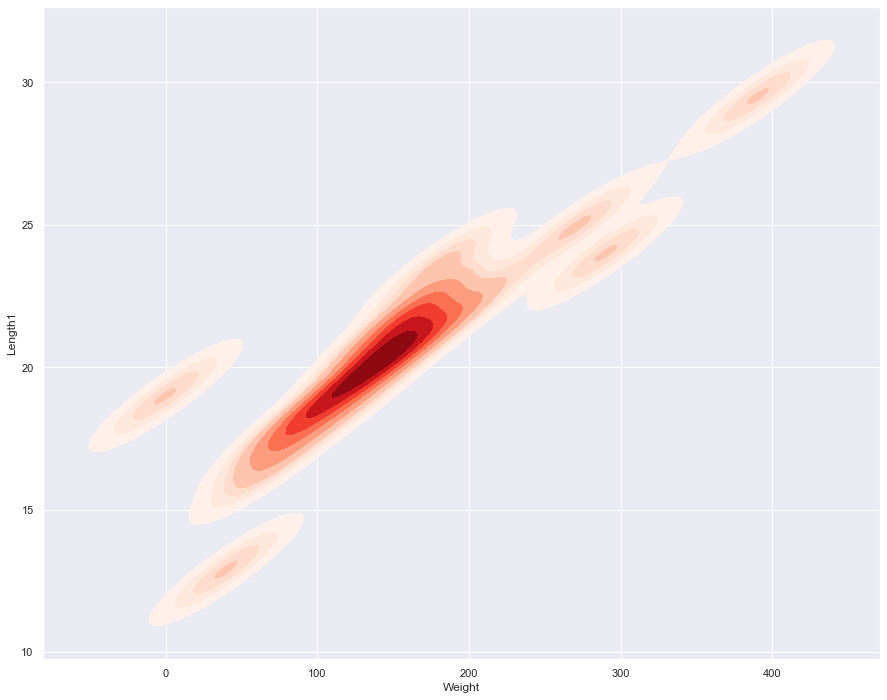

In [34]:
plt.figure(figsize=(15, 12))
sns.kdeplot(x = df_roach["Weight"], y = df_roach["Length1"], cmap = "Reds", shade = True, bw_adjust = .5)

# Bream

![](http://tackletactics.com.au/assets/full_6796_5tipsforsouthernblackbream-Slide.jpg)

The bream is usually 30 to 55 cm (12 to 22 in) long, though some specimens of 75 cm (30 in) have been recorded; it usually weighs 2 to 4 kg (4.4 to 8.8 lb). Its maximum length is 90 cm (35.5 in),the recorded weight is around 9.1 kg (20 lb).

The common bream has a laterally flattened and high-backed body and a slightly undershot mouth. It is a silvery grey colour, though older fish can be bronze-coloured, especially in clear waters. The fins are greyish to black, but never reddish.

The common bream generally lives in rivers (especially in the lower reaches) and in nutrient-rich lakes and ponds with muddy bottoms and plenty of algae. It can also be found in brackish sea waters.[1]

In [35]:
df_bream = df[df["Species"] == "Bream"]

In [36]:
df_bream.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
std,209.205709,3.593699,3.911925,4.157866,1.964707,0.721509
min,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
25%,462.500000,28.000000,30.350000,35.650000,13.958900,4.943400
50%,610.000000,30.400000,33.000000,38.500000,14.954400,5.280100
75%,717.000000,31.950000,35.000000,40.750000,16.360900,6.071600
max,1000.000000,38.000000,41.000000,46.500000,18.957000,6.749700


![](http://tackletactics.com.au/assets/full_6800_982011602635767581048761294958078835294208n.jpg)

## Bream Graph
- Histogram
- Boxplot
- 2D Denstiy
- Map Locations

Text(0.5, 1.0, 'Bream Histogram')

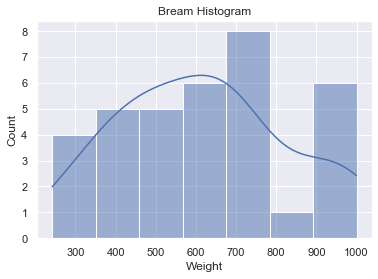

In [37]:
sns.histplot(data=df_bream, x="Weight", kde = True)
plt.title("Bream Histogram")


<AxesSubplot:>

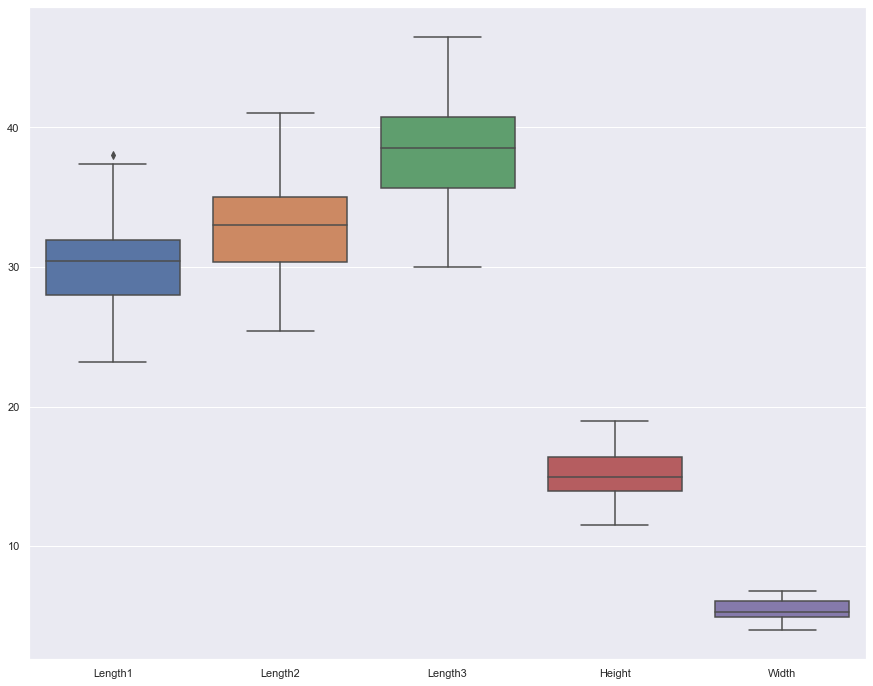

In [38]:

plt.figure(figsize=(15, 12))
sns.boxplot(data=df_bream.loc[:, ["Length1","Length2","Length3", "Height","Width"]])

<AxesSubplot:xlabel='Weight', ylabel='Length1'>

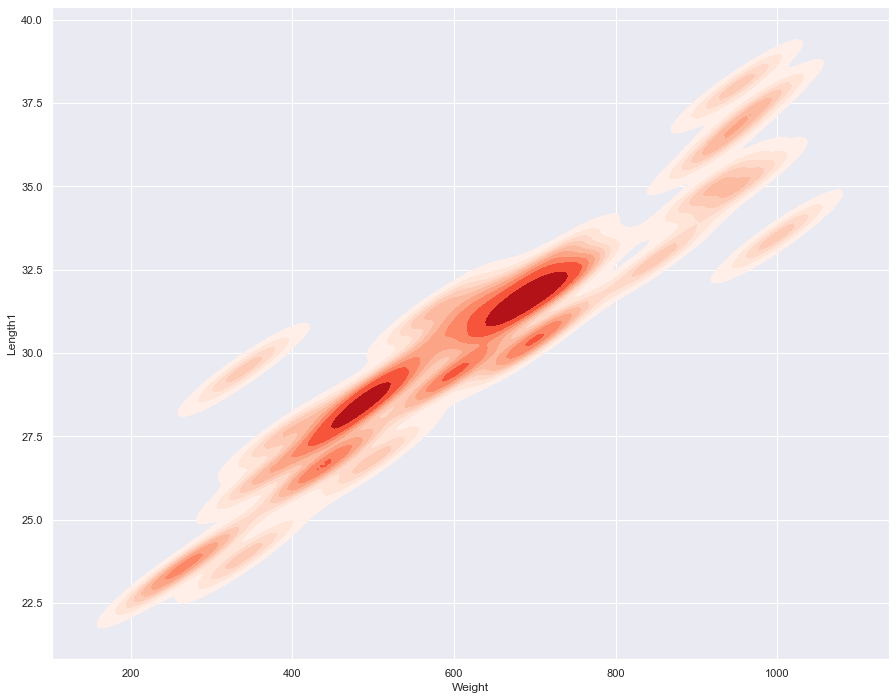

In [39]:
plt.figure(figsize=(15, 12))
sns.kdeplot(x = df_bream["Weight"], y = df_bream["Length1"], cmap = "Reds", shade = True, bw_adjust = .4)

In [40]:
plt.figure(figsize=(15, 10))

map = folium.Map(location=[31.564784644599616, -89.8392593120893], zoom_start= 16)
map

<Figure size 1080x720 with 0 Axes>

# Train - Test Split

In [41]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Dummies 

![](https://media.geeksforgeeks.org/wp-content/uploads/20201210102727/Screenshot708.jpg)

*A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables. A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value*

In [42]:
df_dummies = pd.get_dummies(df)

In [43]:
X = df_dummies.drop("Weight", axis = 1)
y = df_dummies["Weight"]


x_shape = X.shape
y_shape = y.shape

print("X Shape: {}\nY Shape: {}".format(x_shape, y_shape))

X Shape: (159, 12)
Y Shape: (159,)


**Train Test Split**

![](https://www.kdnuggets.com/wp-content/uploads/train_test_split-2.jpg)



The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

x_train_shape = X_train.shape
x_test_shape = X_test.shape

y_train_shape = y_train.shape
y_test_shape = y_test.shape

print("X Train Shape: {}\nX Test Shape: {}\n\n**************\n\nY Train Shape: {}\nY Test Shape: {}".format(x_train_shape, x_test_shape, y_train_shape, y_test_shape))

X Train Shape: (119, 12)
X Test Shape: (40, 12)

**************

Y Train Shape: (119,)
Y Test Shape: (40,)


# Model

# Multivariate linear regression

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/8119b3ed1259aa8ff15166488548104b50a0f92e)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e8d0c4f437e3f224a7a5fa1ca745446d28940448)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/056ade59df741a656fcf42f905aaf95a5628c56d)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/71c383d5c6db8a98fd02f88b33ea8b9e859ab1ed)


[check for detailed information](https://www.hackerearth.com/practice/machine-learning/linear-regression/multivariate-linear-regression-1/tutorial/)

In [45]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.params

Length1               -69.420081
Length2                72.442845
Length3                32.642834
Height                 -9.674121
Width                   4.447944
Species_Bream        -826.888848
Species_Parkki       -685.631402
Species_Perch        -765.671682
Species_Pike        -1158.156677
Species_Roach        -789.911241
Species_Smelt        -496.742140
Species_Whitefish    -784.829537
dtype: float64

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     127.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           3.39e-56
Time:                        21:16:04   Log-Likelihood:                -710.27
No. Observations:                 119   AIC:                             1445.
Df Residuals:                     107   BIC:                             1478.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Length1             -69.4201     49.353     -1.407      0.162    -167.256      28.416
Length2              72.4428     57.948      1.250      0.214     -42.433     187.319
Length3              32.6428     33.236      0.982      0.328     -33.244      98.530
Height               -9.6741     16.914     -0.572      0.569     -43.204      23.856
Width                 4.4479     29.743      0.150      0.881     -54.514      63.410
Species_Bream      -826.8888    153.019     -5.404      0.000   -1130.232    -523.546
Species_Parkki     -685.6314     81.232     -8.440      0.000    -846.664    -524.598
Species_Perch      -765.6717     49.716    -15.401      0.000    -864.228    -667.115
Species_Pike      -1158.1567    110.438    -10.487      0.000   -1377.086    -939.227
Species_Roach      -789.9112     63.379    -12.463      0.000    -915.554    -664.269
Species_Smelt      -496.7421     44.775    -11.094      0.000    -585.504    -407.980
Species_Whitefish  -784.8295     88.576     -8.860      0.000    -960.422    -609.237
==============================================================================
Omnibus:                       30.662   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.378
Skew:                           1.103   Prob(JB):                     3.47e-13
Kurtosis:                       5.590   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  R^2  score of 0.0.

In [47]:
y_hat = results.predict(X_test) 

r2_score(y_test, y_hat)


0.9482958230393622

Text(0.5, 1.0, '')

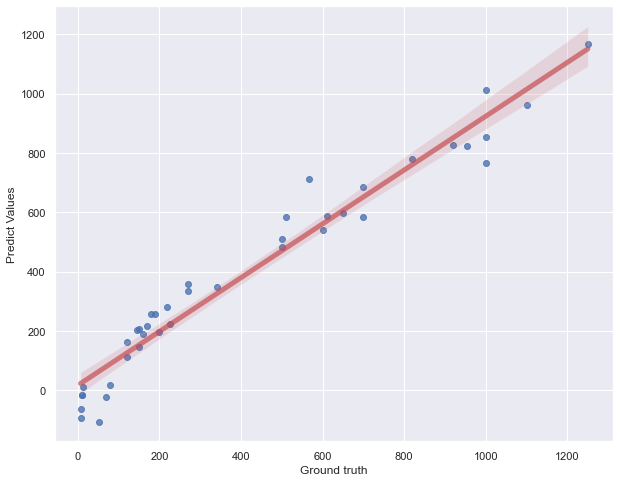

In [48]:
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=y_hat, line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel("Ground truth")
plt.ylabel("Predict Values")
plt.title("")

**Note: linear regression assumptions should be tested. I will make and update soon**


# Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values. 

Cost function for ridge regression
![](https://miro.medium.com/max/1400/1*hAGhQehrqAmT1pvz3q4t8Q.png)

In [49]:
rr = Ridge(alpha=0.01)
rr_model = rr.fit(X_train, y_train)

y_pred = rr_model.predict(X_test)

In [50]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Rmse: {}\nMae: {}\nR^2: {}".format(rmse, mae, r2))

Rmse: 82.07225052447723
Mae: 63.592755485552246
R^2: 0.9483396982482705


Text(0.5, 1.0, 'Ridge Regressor')

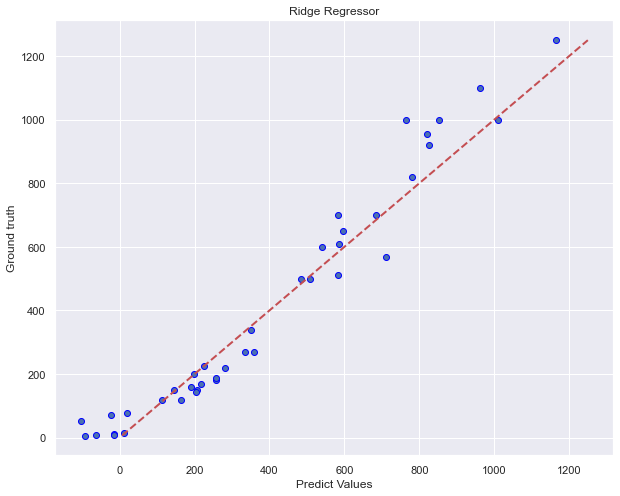

In [51]:
plt.figure(figsize=(10, 8))
plt.scatter(y_pred, y_test, edgecolors = [0,0,1])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw = 2)
plt.xlabel("Predict Values")
plt.ylabel("Ground truth")
plt.title("Ridge Regressor")

the model predicts negative values

In [52]:
y_pred[y_pred < 0]

array([ -63.17033396,  -14.69864931,  -92.20051271,  -15.23234344,
        -22.39135149, -104.19679837])

# Lasso Regression

 The only difference is instead of taking the square of the coefficients, magnitudes are taken into account. This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

Cost function for Lasso regression
![](https://miro.medium.com/max/1400/1*P5Lq5mAi4WAch7oIeiS3WA.png)

In [53]:
lasso = Lasso()
lasso_model = lasso.fit(X_train,y_train)


y_pred = lasso_model.predict(X_test)

C:\Users\Raman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.247e+04, tolerance: 1.502e+03
  model = cd_fast.enet_coordinate_descent(


In [54]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Rmse: {}\nMae: {}\nR^2: {}".format(rmse, mae, r2))

Rmse: 85.74459991526814
Mae: 64.73431257882733
R^2: 0.9436131530706193


Text(0.5, 1.0, 'Lasso Regressor')

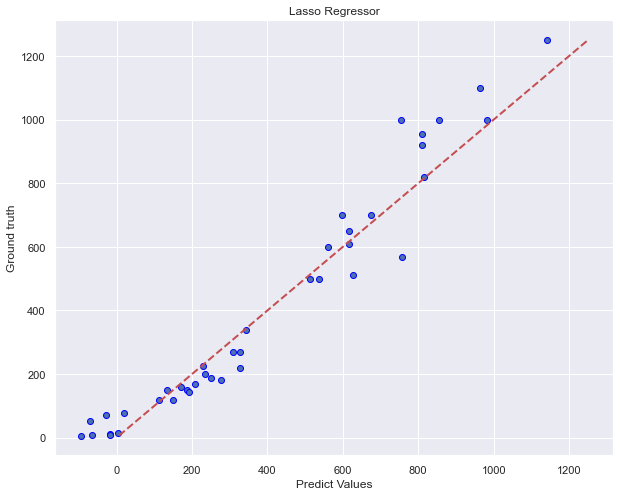

In [55]:
plt.figure(figsize=(10, 8))
plt.scatter(y_pred, y_test, edgecolors = [0,0,1])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw = 2)
plt.xlabel("Predict Values")
plt.ylabel("Ground truth")
plt.title("Lasso Regressor")

lasso predicts negative values like ridge model

In [56]:
y_pred[y_pred < 0]

array([-65.04223445, -17.09338647, -95.62891268, -17.25376134,
       -27.89371065, -70.78094675])

# Random Forest

A random forest regressor.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [57]:
rf_reg = RandomForestRegressor()
rf_reg_model = rf_reg.fit(X_train, y_train)

y_pred = rf_reg_model.predict(X_test)

In [58]:

rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Rmse: {}\nMae: {}\nR^2: {}".format(rmse, mae, r2))

Rmse: 59.368131242485646
Mae: 38.930125
R^2: 0.9729684461474271


Text(0.5, 1.0, 'Random Forest Regressor')

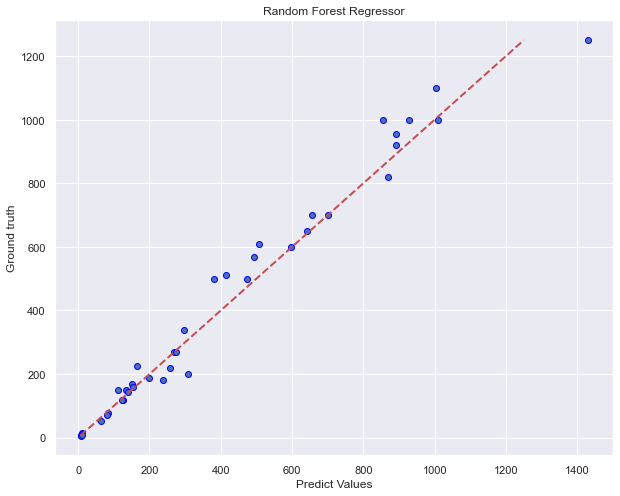

In [59]:
plt.figure(figsize=(10, 8))
plt.scatter(y_pred, y_test, edgecolors = [0,0,1])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw = 2)
plt.xlabel("Predict Values")
plt.ylabel("Ground truth")
plt.title("Random Forest Regressor")

In [60]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)    
def importance_plot(model_name, thresh_hold):
    Importance=pd.DataFrame({"Importance":model_name.feature_importances_*100},
                       index=X_train.columns)
    importance = Importance.sort_values(by="Importance",
                      axis=0,ascending=False).iloc[0:10,:]
    importance.sort_values(by="Importance",
                      axis=0,ascending=True).plot(kind="barh",color="r")
    plt.xlabel("Değişken Önem Düzeyleri")


    a = Importance.sort_values("Importance", ascending = False)
    display_all(a[a['Importance']>thresh_hold])

,Importance
Width,71.671904
Length3,13.122535
Length2,8.082534
Length1,5.574028


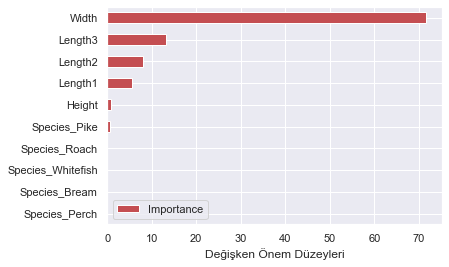

In [61]:
importance_plot(rf_reg_model, 1)

# XGBoost

In [62]:
xgb = XGBRegressor()

xgb_model = xgb.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Rmse: 64.78368243416556
Mae: 39.478449239730836
R^2: 0.9678118871923661


Text(0.5, 1.0, 'XGBoost Regressor')

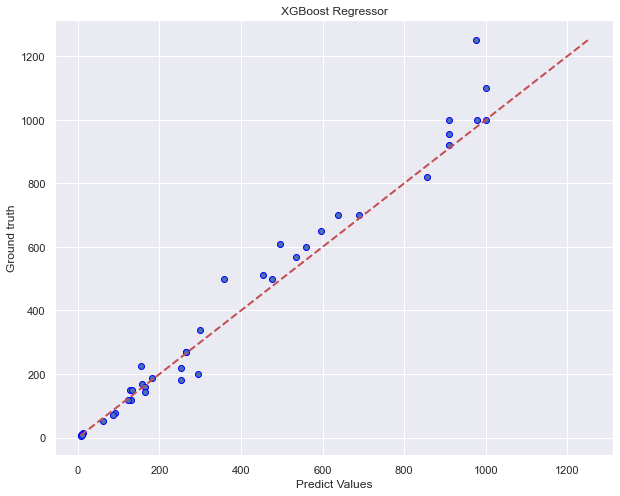

In [63]:
print("Rmse: {}\nMae: {}\nR^2: {}".format(rmse, mae, r2))
plt.figure(figsize=(10, 8))
plt.scatter(y_pred, y_test, edgecolors = [0,0,1])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw = 2)
plt.xlabel("Predict Values")
plt.ylabel("Ground truth")
plt.title("XGBoost Regressor")

,Importance
Width,64.227196
Length3,27.644598
Length1,4.055028
Length2,3.104645


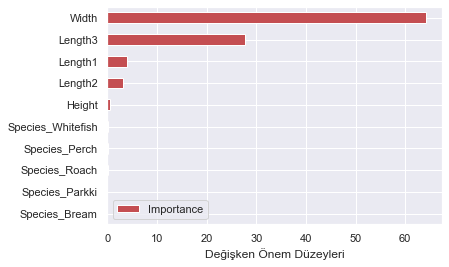

In [64]:
importance_plot(xgb_model, 1)

I wonder your thoughts about the notebook